- - - -
# Mechpy
a mechanical engineer's toolbox 

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

## Math  
 
[Linear Algebra](#Linear-Algebra)  
[Signal Processing](#Signal-Processing)  

[plotting](#Plotting)  
- - - -


This is more or less my notes on using python for a variety of engineering tasks, including plotting, solving equations, linear algebra etc. Some of this work is my own, but many of it is from the scipy documentation.

## Python Initilaization with module imports

In [1]:
# setup 
import numpy as np
import sympy as sp
import scipy
from scipy import linalg
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

#get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting


## Math with Python  
[index](#index)

WHen using ipython, variables and modules can be stored in the console. Use ```%reset``` to remove any modules and variables from the kernal 

The modules used for math are ```numpy``` , ```scipy``` and ```matplotlib```

All the these modules can be accessed with the module ```pylab```, but is not updated as regular as the other packages.

the linear algebra system in python via numpy and scipy is 
a bit awkward at first, but once the nuances are understood
it has most of the functionality of MATLAB with zero the cost

The matrix class of scipy is handy but limits the type of data stored.
 As with MATLAB all "arrays" or "matrices" are just matrices. This is not true with python.
Thus, to avoid confusion, it is discouraged to use the matrix class

TO get started lets looks at numpy arrays, and then later we will use python powerful symbolic math package sympy for a different way to perform calculations



## Linear Algebra with Python
[index](#Mechpy)  

Python's numpy package allows python, a generic computing language to perform powerful mathematical calculations. Although python's math syntax is not as obvious as MATLAB's, the functionality is comparable. This document is designed to be an intro to that syntax 

Some references

http://nbviewer.ipython.org/github/carljv/cython_testing/blob/master/cython_linalg.ipynb

We can either use scipy, which includes numpy, 
http://docs.scipy.org/doc/

or use numpy directly
http://docs.scipy.org/doc/numpy/

Since there are many ways to solve linear algebra problems, (eg Octave/Matlab, julia, scipy, numpy)
I tend to prefer the most matlabesc approaches due to the ubiquity of Matlab and the simplicity of the syntax, which frankly, python suffers with.

The major difference between arrays and matrices in python is that arrays are n-dimensions, where matrices are only up to 2-dimensions  
m

## Numpy arrays

In [2]:
# using the range function to create a numpy array
x = np.array(range(10))
print('x = ',x, 'as a',x.dtype)

x =  [0 1 2 3 4 5 6 7 8 9] as a int32


In [3]:
# using numpy function arange
x = np.arange(10)
print('x = ',x, 'as a',x.dtype)

x =  [0 1 2 3 4 5 6 7 8 9] as a int32


In [4]:
x = np.linspace(0,9,10)
print('x = ',x, 'as a',x.dtype)

x =  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] as a float64


In [5]:
type(x)

numpy.ndarray

In [6]:
# multiple array operations
x*3

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.])

In [7]:
# exponent array operations
x**2

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81.])

In [8]:
# trig array operations
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [9]:
x.sum()

45.0

In [10]:
print([k for k in dir(x) if k[:2] != '__' ])

['T', 'all', 'any', 'argmax', 'argmin', 'argpartition', 'argsort', 'astype', 'base', 'byteswap', 'choose', 'clip', 'compress', 'conj', 'conjugate', 'copy', 'ctypes', 'cumprod', 'cumsum', 'data', 'diagonal', 'dot', 'dtype', 'dump', 'dumps', 'fill', 'flags', 'flat', 'flatten', 'getfield', 'imag', 'item', 'itemset', 'itemsize', 'max', 'mean', 'min', 'nbytes', 'ndim', 'newbyteorder', 'nonzero', 'partition', 'prod', 'ptp', 'put', 'ravel', 'real', 'repeat', 'reshape', 'resize', 'round', 'searchsorted', 'setfield', 'setflags', 'shape', 'size', 'sort', 'squeeze', 'std', 'strides', 'sum', 'swapaxes', 'take', 'tobytes', 'tofile', 'tolist', 'tostring', 'trace', 'transpose', 'var', 'view']


## Logical Indexing

In [11]:
# logical indexing
3 < x

array([False, False, False, False,  True,  True,  True,  True,  True,  True], dtype=bool)

In [12]:
# negate logical indexing
~(3 < x)

array([ True,  True,  True,  True, False, False, False, False, False, False], dtype=bool)

In [13]:
# logical indexing and 
(3 < x) & (x < 5)

array([False, False, False, False,  True, False, False, False, False, False], dtype=bool)

In [14]:
# logical index or
(3 < x) | (x < 5)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [15]:
# logical indexing and 
(3 < x) & (x < 5)

array([False, False, False, False,  True, False, False, False, False, False], dtype=bool)

In [16]:
z = (3 < x) & (x < 5)
z

array([False, False, False, False,  True, False, False, False, False, False], dtype=bool)

In [17]:
# if 0,1 is preferred, changethe datatype
z.astype(np.int)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

## numpy arrays as a matrix

In [18]:
# createa 1x3 array
c = np.array([1,2,3])
print('c =',c,' of shape',c.shape)

c = [1 2 3]  of shape (3,)


In [19]:
#does not  convert to 3x1 since it is only a 1d array
# this is not what I would expected, so I will call it a nuance of arrays in python
c.transpose()

array([1, 2, 3])

In [20]:
# we must reshape it
c = c.reshape((1,3))
print('c =',c,' of shape',c.shape)

c = [[1 2 3]]  of shape (1, 3)


In [21]:
c.transpose()

array([[1],
       [2],
       [3]])

In [22]:
# or when we defined it, add brackets in it to create a true 1x3 array
c = np.array([[1,2,3]])
print('c =',c,' of shape',c.shape)

c = [[1 2 3]]  of shape (1, 3)


In [23]:
# now we can transpose it.
c.transpose() 

array([[1],
       [2],
       [3]])

In [24]:
print('c =',c,' of shape',c.shape)

c = [[1 2 3]]  of shape (1, 3)


In [25]:
c.shape

(1, 3)

In [26]:
# lets creat some matrices (but recall use the array)
a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 4], [5, 7]])

In [27]:
a

array([[1, 2],
       [3, 4]])

In [28]:
b

array([[1, 4],
       [5, 7]])

In [29]:
a * b

array([[ 1,  8],
       [15, 28]])

In [30]:
# to perform a matrix multiplecation on an array, use 
a @ b

array([[11, 18],
       [23, 40]])

In [31]:
# or 
np.dot(a,b)

array([[11, 18],
       [23, 40]])

In [32]:
# to solve ax=b, use 
linalg.solve(a,b)

array([[ 3. , -1. ],
       [-1. ,  2.5]])

In [33]:
# or slower and less accurate
linalg.inv(a) @ b

array([[ 3. , -1. ],
       [-1. ,  2.5]])

In [34]:
# or 
linalg.inv(a).dot(b)

array([[ 3. , -1. ],
       [-1. ,  2.5]])

$ 3 x_0 + x_1 = 9 $ 

$ x_0 + 2x_1 = 8 $

$ Ax=b  $

$ \left[\begin{matrix}3 & 1\\1 & 2\end{matrix}\right]  \left[\begin{matrix}x_0\\x_1\end{matrix}\right] = \left[\begin{matrix}9\\8\end{matrix}\right] $

$ \left[\begin{matrix}x_0\\x_1\end{matrix}\right] = \left[\begin{matrix}2\\3\end{matrix}\right] $

In [35]:
# 3 * x0 + x1 = 9 and x0 + 2 * x1 = 8
a = np.array([[3,1], [1,2]])
b = np.array([[9],[8]])
x = np.linalg.solve(a, b)
x

array([[ 2.],
       [ 3.]])

In [36]:
# lets create a 2x5 zeros matrix
c = np.zeros((2,5))
c

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [37]:
# With numpy, we can create arrays of numbers as well as functions that accept arrays
f = lambda x,y: np.sqrt(x**2+y**2)

In [38]:
f(3,4)

5.0

In [39]:
a = 3.1
b = np.arange(15,35, 0.75)
f(a,b)

array([ 15.31698404,  16.05218054,  16.78868667,  17.52633732,
        18.26499384,  19.00453893,  19.74487275,  20.48590979,
        21.2275764 ,  21.96980883,  22.7125516 ,  23.45575622,
        24.19938016,  24.9433859 ,  25.68774027,  26.43241381,
        27.1773803 ,  27.92261628,  28.66810074,  29.41381478,
        30.15974138,  30.90586514,  31.65217212,  32.39864966,
        33.14528624,  33.89207134,  34.63899537])

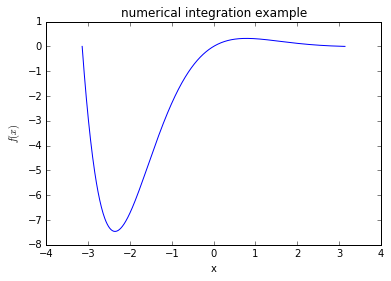

In [40]:
# We can also perform numerical differentiation and integration
x = np.arange(-np.pi,np.pi, 0.01)
y = np.sin(x)*np.exp(-x)
plt.plot(x,y);
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title('numerical integration example')
plt.show()

In [41]:
# Using the trapezoidal rule, we can numerically integrate the function
np.trapz(y,x)

-11.5485471009

# Symbolic Math with Sympy 

in ipython use ```help(integrate)``` or ```integrate?``` to check syntax or learn about the command. To clear the previous modules use ```%reset``` to clear variables and imports.  It is also very import to not import over other modules or difficult errors to troubleshoot may appear. This is especially important with numpy and sympy

In [42]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Now we can initialize the console to have very nice looking mathematical expressions. If we dont do this, the text will be simple ascii characters

In [74]:
import sympy as sp
import numpy as np

In [45]:
sp.init_printing()

In [46]:
x,y = sp.symbols('x y')

I really enjoy using sympy because I can type my equations in, evaluate them, and it shows them very nice, which is easier to read then lines of text. Simple expressions are easy to make

In [47]:
y = (sp.pi + x)**2
y

In [48]:
y.subs(x,1.3)

In [49]:
# or to get a number
sp.N(y.subs(x,1.3))

In [50]:
# calculus is also easy
sp.diff(y)


In [51]:
f = sp.Function('f')(x)

In [52]:
f = sp.sin(x)*sp.exp(-x)
f

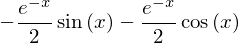

In [53]:
F = sp.integrate(f)
F

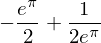

In [54]:
F1 = sp.integrate(f,(x,-sp.pi,sp.pi ))
# as shown numerically, we can symbolically evaluate the function 
#  and get the same result
F1

In [55]:
float(F1)

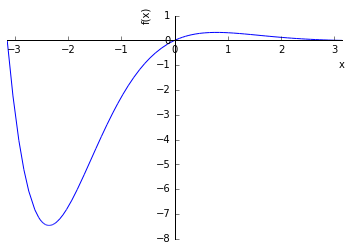

In [56]:
sp.plot(f,(x,-sp.pi,sp.pi));

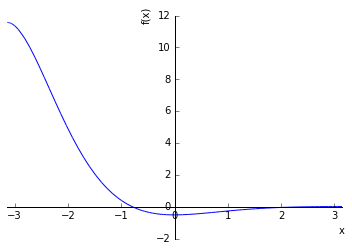

In [57]:
sp.plot(F,(x,-sp.pi,sp.pi));

In [58]:
# Other various math tasks can be much easier when using sympy

In [59]:
n = sp.symbols('n')

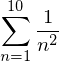

In [60]:
sum_fcn = sp.Sum(1/n**2, (n,1,10))
sum_fcn

In [61]:
# to evaluate the summation simply add the evalf method
sum_fcn.evalf()

In [62]:
sp.latex(sum_fcn)

'\\sum_{n=1}^{10} \\frac{1}{n^{2}}'

Since this is a windows machine, the latex command printed two backslashes, if we change that to single backslashes we can get the latex version of the summation 
$$
\sum_{n=1}^{10}\frac{1}{n^{2}}
$$

In [63]:
from IPython.display import Latex
Latex('$sum\_fcn=' + sp.latex(sum_fcn) + '$' )

<IPython.core.display.Latex object>

In [64]:
# linear algebra

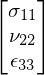

In [65]:
s11, n22, e33 = sp.symbols("sigma11 nu22 epsilon33")
A = sp.Matrix([[s11],[n22],[e33]])
A

In [66]:
m11, m12, m21, m22 = sp.symbols("m11, m12, m21, m22")
b1, b2 = sp.symbols("b1, b2")

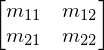

In [67]:
A = sp.Matrix([[m11, m12],[m21, m22]])
A

In [68]:
b = sp.Matrix([[b1], [b2]])
b

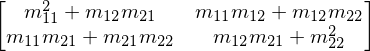

In [69]:
A**2

In [70]:
A.det()

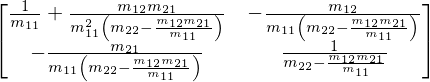

In [71]:
A.inv()

## mixed symbols and numerals linear algebra

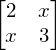

In [92]:
x = sp.Symbol('x')   # x = var('x')
M = sp.Matrix([[2,x],[x,3]])
M

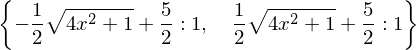

In [93]:
M.eigenvals()

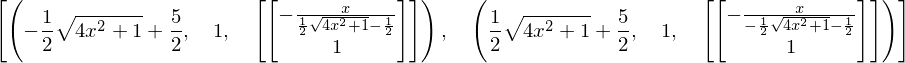

In [94]:
M.eigenvects()

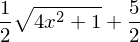

In [95]:
M.eigenvects()[1][0]

In [96]:
Mval = M.eigenvects()[1][0]
Mval.evalf(subs={x:3.14})

In [97]:
print(sp.latex(M))

\left[\begin{matrix}2 & x\\x & 3\end{matrix}\right]


In [98]:
from IPython.display import Latex
Latex('$M=' + sp.latex(M) + '$' )

<IPython.core.display.Latex object>

Pythons list is a generic data storage object. it can be easily extended to a numpy array, which is specialized for numerical and scientific computation 

In [75]:
np.zeros((5,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [76]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [77]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [78]:
# Matrix multiplication can be achieved using the dot method
i = [[1,0,0],[0,1,0],[0,0,1]]  # identiy matrix
a = [[4,3,1],[5,7,2],[2,2,2]]
np.dot(i,a)

array([[4, 3, 1],
       [5, 7, 2],
       [2, 2, 2]])

In [79]:
#Or, matrix multiplication can be done if a matrix is explicitly defined
np.array(i) @ np.array(a)

array([[4, 3, 1],
       [5, 7, 2],
       [2, 2, 2]])

In [82]:
# Notice, when arrays are mutliplied, we get the dot product 
m = np.array(i) * np.array(a)
m

array([[4, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [83]:
m.T  # transpose

array([[4, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [85]:
m**2

array([[16,  0,  0],
       [ 0, 49,  0],
       [ 0,  0,  4]])

In [86]:
np.array(a)**2

array([[16,  9,  1],
       [25, 49,  4],
       [ 4,  4,  4]])

In [87]:
m

array([[4, 0, 0],
       [0, 7, 0],
       [0, 0, 2]])

In [88]:
m[:,2]

array([0, 0, 2])

In [89]:
m[2,:]

array([0, 0, 2])

In [90]:
m[:2,:2]

array([[4, 0],
       [0, 7]])

In [91]:
m[1:,1:]

array([[7, 0],
       [0, 2]])

## Symbolic mathematics with sympy

In [123]:
# import sympy library and initialize latex printing
import sympy as sp
#sp.init_printing()
#sp.init_printing(use_latex='matplotlib')
sp.init_printing(use_latex='mathjax')

In [124]:
# add a symbolic character
x = sp.Symbol('x')

In [125]:
sp.sqrt(x**2)

   ____
  ╱  2 
╲╱  x  

In [126]:
r = sp.Rational(11, 13)
r

11
──
13

In [127]:
float(r)

0.8461538461538461

In [128]:
f = sp.Function('f')
f

f

In [129]:
f(x)

f(x)

In [130]:
h = sp.Lambda(x,x**2)
h

     2
x ↦ x 

In [131]:
w = 2*(x**2-x)-x*(x+1)
w

   2                  
2⋅x  - x⋅(x + 1) - 2⋅x

In [132]:
w.args

⎛         2            ⎞
⎝-2⋅x, 2⋅x , -x⋅(x + 1)⎠

In [133]:
sp.simplify(w)

x⋅(x - 3)

In [134]:
sp.factor(x**2-1)

(x - 1)⋅(x + 1)

In [135]:
#partial fractions
y = 1/(x**2+3*x+2)
y

     1      
────────────
 2          
x  + 3⋅x + 2

In [136]:
sp.apart(y,x)

    1       1  
- ───── + ─────
  x + 2   x + 1

In [137]:
f = sp.Function('f')(x)
sp.diff(f,x)

d       
──(f(x))
dx      

In [138]:
y = sp.Symbol('y')
g = sp.Function('g')(x,y)
g.diff(x,y)

   2          
  ∂           
─────(g(x, y))
∂y ∂x         

In [139]:
a,b,c,d = sp.symbols("a b c d")
M = sp.Matrix([[a,b],[c,d]])
M

⎡a  b⎤
⎢    ⎥
⎣c  d⎦

In [140]:
M*M

⎡ 2                  ⎤
⎢a  + b⋅c   a⋅b + b⋅d⎥
⎢                    ⎥
⎢                  2 ⎥
⎣a⋅c + c⋅d  b⋅c + d  ⎦

In [141]:
# if ipython is to be used as a calculator initialize with 
from sympy import init_session
init_session() 

IPython console for SymPy 1.0 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [162]:
from sympy import oo, Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import sympy as sp
import numpy as np
import matplotlib.pyplot as mp
get_ipython().magic('matplotlib inline')
# this will print output as unicode

In [163]:
# assign a sympy variable
x = sp.var('x')
x

In [164]:
#assign a function 
f =  sp.sin(6*x)*sp.exp(-x)
f

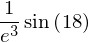

In [165]:
f.subs(x,3)

In [166]:
float(f.subs(x,3))

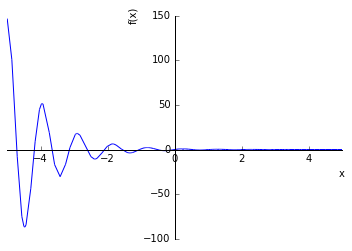

In [168]:
sp.plot(f,(x,-5,5))

In [169]:
# a onetime pretty print
sp.pprint(f)

 -x         
ℯ  ⋅sin(6⋅x)


In [170]:
#or we can print the latex rendering
sp.latex(f)

'e^{- x} \\sin{\\left (6 x \\right )}'

In [171]:
# first derivative
df = f.diff()
df

In [172]:
# differentaite f'' wrt x
sp.diff(f,x,1)

In [173]:
# substitute x with pi
f.subs(x,np.pi)

In [174]:
#%% Numeric Computation from the documentation
from sympy.abc import x

In [175]:
# lambdify using the math module, 10^2 faster than subs
expr = sp.sin(x)/x
f = sp.lambdify(x,expr)
f(3.14)

In [177]:
# lambdify using numpy
f = sp.lambdify(x,expr, "numpy")
f(np.linspace(1,3.14,20))

array([  8.41470985e-01,   8.06076119e-01,   7.67912588e-01,
         7.27262596e-01,   6.84424864e-01,   6.39711977e-01,
         5.93447624e-01,   5.45963742e-01,   4.97597617e-01,
         4.48688937e-01,   3.99576866e-01,   3.50597122e-01,
         3.02079129e-01,   2.54343238e-01,   2.07698064e-01,
         1.62437944e-01,   1.18840569e-01,   7.71647744e-02,
         3.76485431e-02,   5.07214305e-04])

## Signal Processing

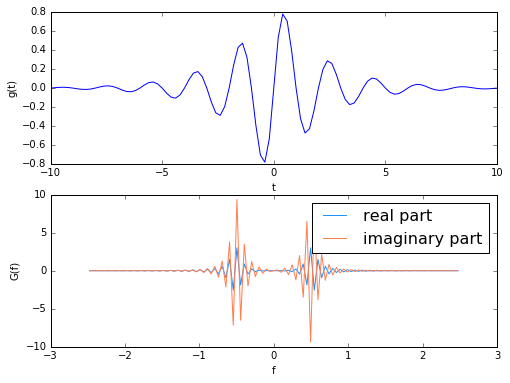

In [121]:

## Signal Processing
#Page 174 Introduction for python for Science - David Pine

import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline') # inline plotting
width = 2.0
freq = 0.5
t = np.linspace(-10, 10, 101) # linearly space time array
g = np.exp(-np.abs(t)/width)*np.sin(2.0 * np.pi * freq * t)
dt = t[1]-t[0] # increment between times in time array
G = fftpack.fft(g) # FFT of g
f = fftpack.fftfreq(g.size, d=dt) # frequenies f[i] of g[i]
f = fftpack.fftshift(f) # shift frequencies from min to max
G = fftpack.fftshift(G) # shift G order to coorespond to f
fig = plt.figure(1, figsize=(8,6), frameon=False)
ax1 = fig.add_subplot(211)
ax1.plot(t, g)
ax1.set_xlabel('t')
ax1.set_ylabel('g(t)')
ax2 = fig.add_subplot(212)
ax2.plot(f, np.real(G), color='dodgerblue', label='real part')
ax2.plot(f, np.imag(G), color='coral', label='imaginary part')
ax2.legend()
ax2.set_xlabel('f')
ax2.set_ylabel('G(f)')
plt.show()

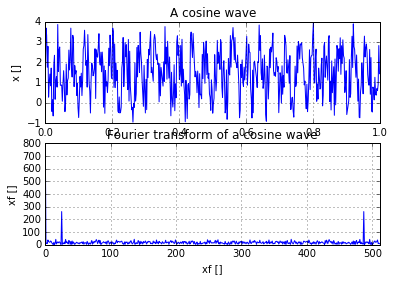

In [122]:
from pylab import *
from scipy import fft
get_ipython().magic('matplotlib inline') # inline plotting
N = 2**9
F = 25
t = arange(N)/float(N)
x = cos(2*pi*t*F) + rand(len(t))*3
subplot(2,1,1)
plot(t,x)
ylabel('x []')
xlabel('t [seconds]')
title('A cosine wave')
grid()

subplot(2,1,2)
f = t*N
xf = fft(x)
plot(f,abs(xf))
title('Fourier transform of a cosine wave')
xlabel('xf []')
ylabel('xf []')
xlim([0,N])
grid()
show()

# note the spike at 25 hz and 512-25

## Differential Equations

In [101]:
# see here for example scripts
# C:\Users\Neal\Anaconda3\Lib\site-packages\sympy\mpmath\tests
from sympy import Function, dsolve, Eq, Derivative, sin,cos,symbols
from sympy.abc import x
import numpy as np
import sympy as sp
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt

In [102]:
f = Function('f')
deq = dsolve(Derivative(f(x), x,x) + 9*f(x), f(x))
deq

In [103]:
diffeq1_sym = deq.args[1]
diffeq1_sym

In [104]:
diffeq1 = diffeq1_sym.subs({'C1':1, 'C2':0.5})
diffeq1

In [105]:
diffeq1_f = sp.lambdify(x,diffeq1, "numpy")
diffeq1_f

<function numpy.<lambda>>

In [106]:
diffeq1arr = diffeq1_f(np.linspace(1,3.14,20))
diffeq1arr

array([-0.35387624, -0.68544104, -0.93948885, -1.08728921, -1.11212728,
       -1.0111941 , -0.79590429, -0.49060511, -0.12982305,  0.24564078,
        0.59332492,  0.87390954,  1.05566313,  1.11803104,  1.05396004,
        0.87069598,  0.5889643 ,  0.24062625, -0.1349244 , -0.49521635])

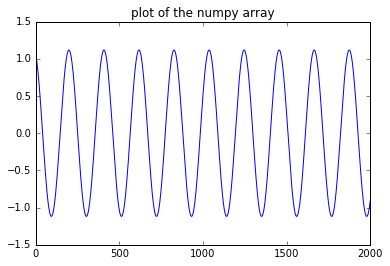

In [107]:
# numpy plot
plt.plot(diffeq1_f(np.linspace(-10,10,2000)));
plt.title('plot of the numpy array');

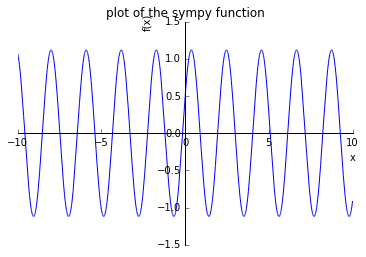

In [108]:
# sympy plot
sp.plot(diffeq1, title='plot of the sympy function');

## Differential Equations Quiver plot

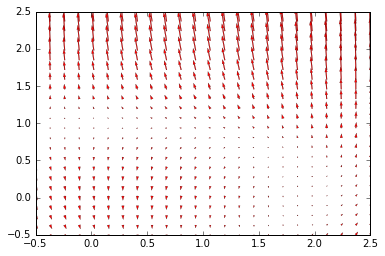

In [118]:
# quiver plot
f=lambda x: [x[0]**2 - 2*x[0] - x[1] + 0.5, x[0]**2 + 4*x[1]**2 - 4]
x,y=np.mgrid[-0.5:2.5:24j,-0.5:2.5:24j]
U,V=f([x,y])
plt.quiver(x,y,U,V,color='r', \
         linewidths=(0.2,), edgecolors=('k'), \
         headaxislength=5)
plt.show()